Linear regression is used to predict the value of a continuous variable `Y` based on one or more input predictor variables `X`. The aim is to establish a mathematical formula between the the response variable `Y` and the predictor variables `X`. You can use this formula to predict `Y`, when only `X` values are known.

#### Introduction to Linear Regression

Linear regression is one of the most commonly used predictive modelling techniques. The aim of linear regression is to find a mathematical equation for a continuous response variable `Y` as a function of one or more `X` variable(s). So that you can use this regression model to predict the `Y` when only the `X` is known.

This mathematical equation can be generalised as follows:

$$Y = \beta_{1} + \beta_{2} X + \epsilon$$
where, β1 is the intercept and β2 is the slope.

Collectively, they are called regression coefficients and `ϵ` is the error term.

#### Example Problem

For this analysis, we will use the `cars` dataset that comes with R by default.

`cars` is a standard built-in dataset, that makes it convenient to show linear regression in a simple and easy to understand fashion.

You can access this dataset by typing in `cars` in your R console.

You will find that it consists of 50 observations(rows) and 2 variables (columns) – dist and speed.

Lets print out the first six observations here.

In [39]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


The goal here is to establish a mathematical equation for `dist` as a function of `speed`, so you can use it to predict `dist` when only the `speed` of the car is known.

So it is desirable to build a linear regression model with the response variable as dist and the predictor as `speed`.

Before we begin building the regression model, it is a good practice to analyse and understand the variables.

The graphical analysis and correlation study below will help with this.

#### Graphical Analysis

The aim of this exercise is to build a simple regression model that you can use to predict Distance (dist).

This is possible by establishing a mathematical formula between Distance (dist) and Speed (speed).

But before jumping in to the syntax, lets try to understand these variables graphically.

Typically, for each of the predictors, the following plots help visualise the patterns:

Scatter plot: Visualise the linear relationship between the predictor and response

Box plot: To spot any outlier observations in the variable. Having outliers in your predictor can drastically affect the predictions as they can affect the direction/slope of the line of best fit.

Density plot: To see the distribution of the predictor variable. Ideally, a close to normal distribution (a bell shaped curve), without being skewed to the left or right is preferred.

Let us see how to make each one of them.

#### Scatter Plot To Visualise The Relationship

Scatter plots can help visualise linear relationships between the response and predictor variables.

Ideally, if you have many predictor variables, a scatter plot is drawn for each one of them against the response, along with the line of best fit as seen below.

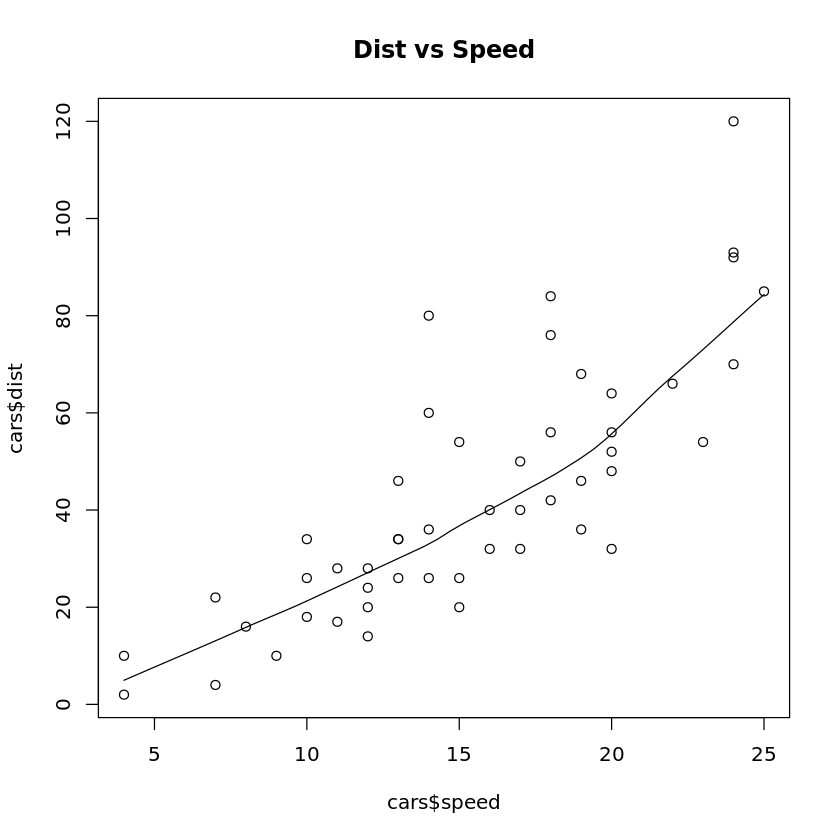

In [40]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist vs Speed")  # scatterplot

The scatter plot along with the smoothing line above suggests a linear and positive relationship between the `dist` and `speed`.
This is a good thing.
Because, one of the underlying assumptions of linear regression is, the relationship between the response and predictor variables is linear and additive.

#### BoxPlot To Check For Outliers

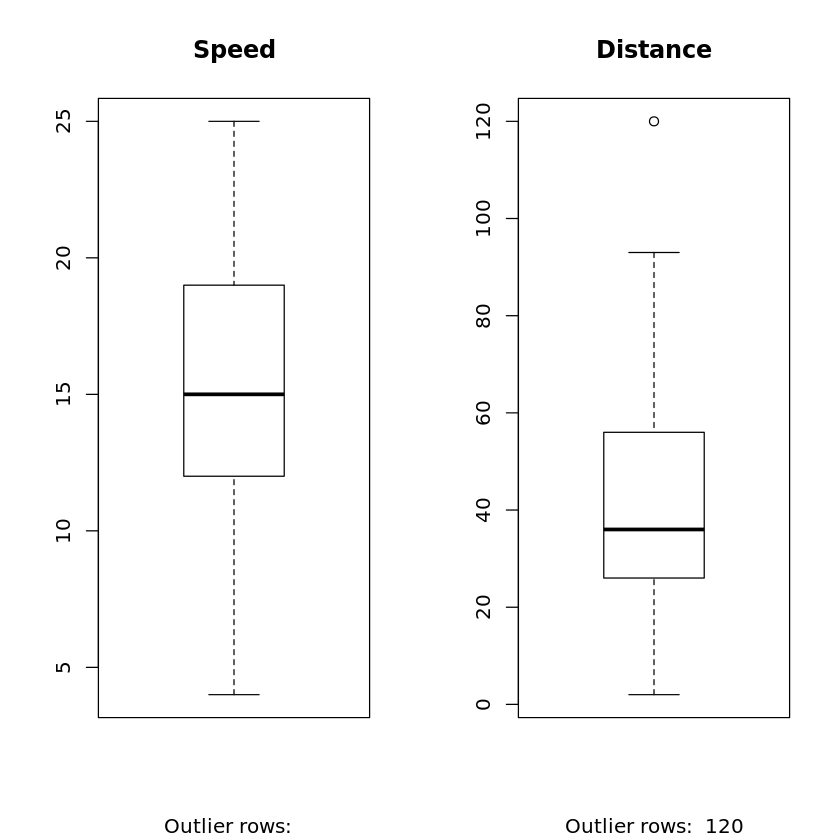

In [41]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns

boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'

boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance'

#### Density Plot

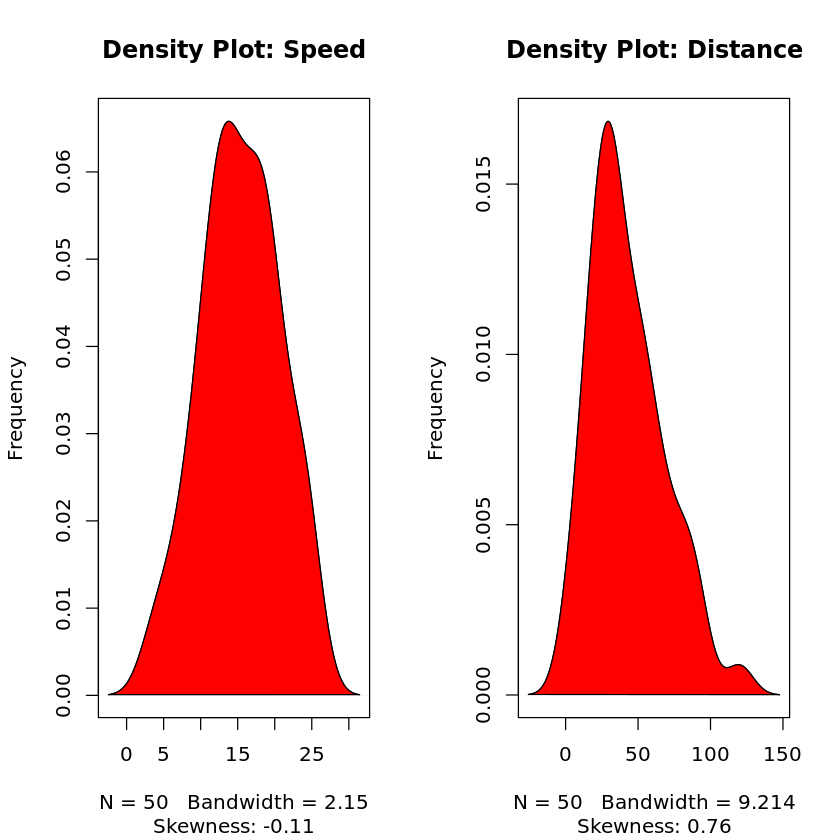

In [42]:
library(e1071)  # for skewness function
par(mfrow=c(1, 2))  # divide graph area in 2 columns

plot(density(cars$speed), main="Density Plot: Speed", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))  # density plot for 'speed'

polygon(density(cars$speed), col="red")

plot(density(cars$dist), main="Density Plot: Distance", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))  # density plot for 'dist'

polygon(density(cars$dist), col="red")

#### Correlation Analysis

Correlation analysis studies the strength of relationship between two continuous variables. It involves computing the correlation coefficient between the the two variables.

So what is correlation? And how is it helpful in linear regression?

Correlation is a statistical measure that shows the degree of linear dependence between two variables.  
In order to compute correlation, the two variables must occur in pairs, just like what we have here with speed and dist.  
Correlation can take values between -1 to +1.  
If one variables consistently increases with increasing value of the other, then they have a strong positive correlation (value close to +1).  
Similarly, if one consistently decreases when the other increase, they have a strong negative correlation (value close to -1). 
A value closer to 0 suggests a weak relationship between the variables.

However, correlation doesn’t imply causation.  
In other words, if two variables have high correlation, it does not mean one variable ’causes’ the value of the other variable to increase.  
Correlation is only an aid to understand the relationship.

In [43]:
#Simply use the cor() function with the two numeric variables as arguments to compute correlation.
cor(cars$speed, cars$dist)

[1] 0.8068949

#### Building the Linear Regression Model

Now that you have seen the linear relationship pictorially in the scatter plot and through correlation, let’s try building the linear regression model.

The function used for building linear models is `lm()`.

The `lm()` function takes in two main arguments:  
Formula  
Data  

In [44]:
lm_Mod <- lm(dist ~ speed, data=cars)  # build linear regression model on full data
print(lm_Mod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



By building the linear regression model, we have established the relationship between the predictor and response in the form of a mathematical formula.

That is Distance (dist) as a function for speed.

For the above output, you can notice the ‘Coefficients’ part having two components: Intercept: -17.579, speed: 3.932.

These are also called the beta coefficients. In other words,

$$dist = Intercept + (β ∗ speed)$$

`dist = −17.579 + 3.932∗speed`

#### Diagnostics

Now the linear model is built and you have a formula that you can use to predict the dist value if a corresponding speed is known.  
But this is actually not enough to use this model.  
Because, before using a regression model to make predictions, you need to ensure that it is statistically significant. But How do you ensure this?  
Lets begin by printing the summary statistics for linearMod.

In [45]:
summary(lm_Mod)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


The Summary Stats above tells us a number of things,but for the sake of this tutorial we will only explore `p-value` which is widely considered

#### Checking For Statistical Significance using p Value 

The p-Values are very important.  
p-Value (in last line) and the p-Value of individual predictor variables (extreme right column under ‘Coefficients’).  
Because, we can consider a linear model to be statistically significant only when both these p-Values are less than the pre-determined statistical significance level of 0.05.  
This can visually interpreted by the significance stars at the end of the row against each X variable.  
The more the stars beside the variable’s p-Value, the more significant the variable.  

#### Predicting Linear Models

So far you have seen how to build a linear regression model using the whole dataset. If you build it that way, there is no way to tell how the model will perform with new data.  
So the preferred practice is to split your dataset into a 80:20 sample (training:test), then, build the model on the 80% sample and then use the model thus built to predict the dependent variable on test data.  
Doing it this way, we will have the model predicted values for the 20% data (test) as well as the actuals (from the original dataset).  
By calculating accuracy measures (like min_max accuracy) and error rates (MAPE or MSE), you can find out the prediction accuracy of the model.  
Now, lets see how to actually do this.

#### Create the training and test data

In [46]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(cars), 0.8*nrow(cars))  # row indices for training data
trainingData <- cars[trainingRowIndex, ]  # model training data
testData  <- cars[-trainingRowIndex, ]   # test data

#### Fit the model on training data and predict dist on test data

In [47]:
lmMod <- lm(dist ~ speed, data=trainingData)  # build the model
distPred <- predict(lmMod, testData)  # predict distance

#### Measures

In [48]:
summary(lmMod)  # model summary


Call:
lm(formula = dist ~ speed, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.350 -10.771  -2.137   9.255  42.231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -22.657      7.999  -2.833  0.00735 ** 
speed          4.316      0.487   8.863 8.73e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.84 on 38 degrees of freedom
Multiple R-squared:  0.674,	Adjusted R-squared:  0.6654 
F-statistic: 78.56 on 1 and 38 DF,  p-value: 8.734e-11


From the model summary, the model p value and predictor’s p value are less than the significance level.  
So you have a statistically significant model.  
Also, the R-Sq and Adj R-Sq are comparative to the original model built on full data.

In [49]:
distPred

1         4         8        20        26        31        37        39 
-5.392776  7.555787 20.504349 37.769100 42.085287 50.717663 59.350038 63.666225 
       40        42 
63.666225 63.666225

#### Calculate prediction accuracy

A simple correlation between the actuals and predicted values can be used as a form of accuracy measure.  
A higher correlation accuracy implies that the actuals and predicted values have similar directional movement, i.e. when the actuals values increase the predicted values also increase and vice-versa.

In [50]:
actuals_preds <- data.frame(cbind(actuals=testData$dist, predicteds=distPred))  # make actuals vs predicteds dataframe.
head(actuals_preds)

,actuals,predicteds
1,2,-5.392776
4,22,7.555787
8,26,20.504349
20,26,37.769100
26,54,42.085287
31,50,50.717663


In [51]:
accuracy <- cor(actuals_preds)  # 82.7%
accuracy

,actuals,predicteds
actuals,1.0000000,0.8277535
predicteds,0.8277535,1.0000000
